# Dataset Overview

### Dataset description, modalities distribution and visualization

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# FIXME: Remove the two first instructions
import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset


In [2]:
DATASET_PATH= './Data'
ds = Dataset(path=DATASET_PATH)

In [3]:
ds_size = len(ds)
print(f'The dataset size is {ds_size}')

The dataset size is 10


In [4]:
from collections import Counter

#FIXME: Change function name. Change dp and ds names
#TODO: Add percentages
def category_pie(ds, attribute_getter, figure_name):
    def category_list():
        categories = []
        for dp in ds:
            categories += [attribute_getter(dp)]

        return categories
    count_dict = Counter(category_list())
    plt.figure()
    plt.title(figure_name)
    plt.pie(count_dict.values(), labels=count_dict.keys())


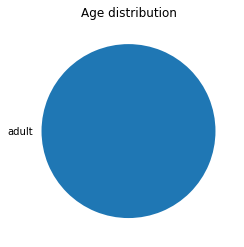

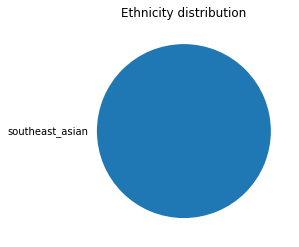

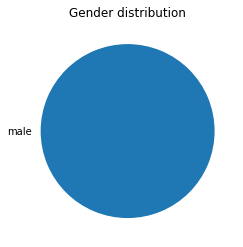

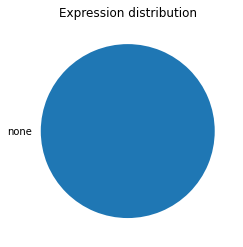

In [5]:
category_pie(ds, lambda dp : dp.identity_label.age, 'Age distribution')
category_pie(ds, lambda dp : dp.identity_label.ethnicity, 'Ethnicity distribution')
category_pie(ds, lambda dp : dp.identity_label.gender, 'Gender distribution')
category_pie(ds, lambda dp : dp.face_expression.name, 'Expression distribution')

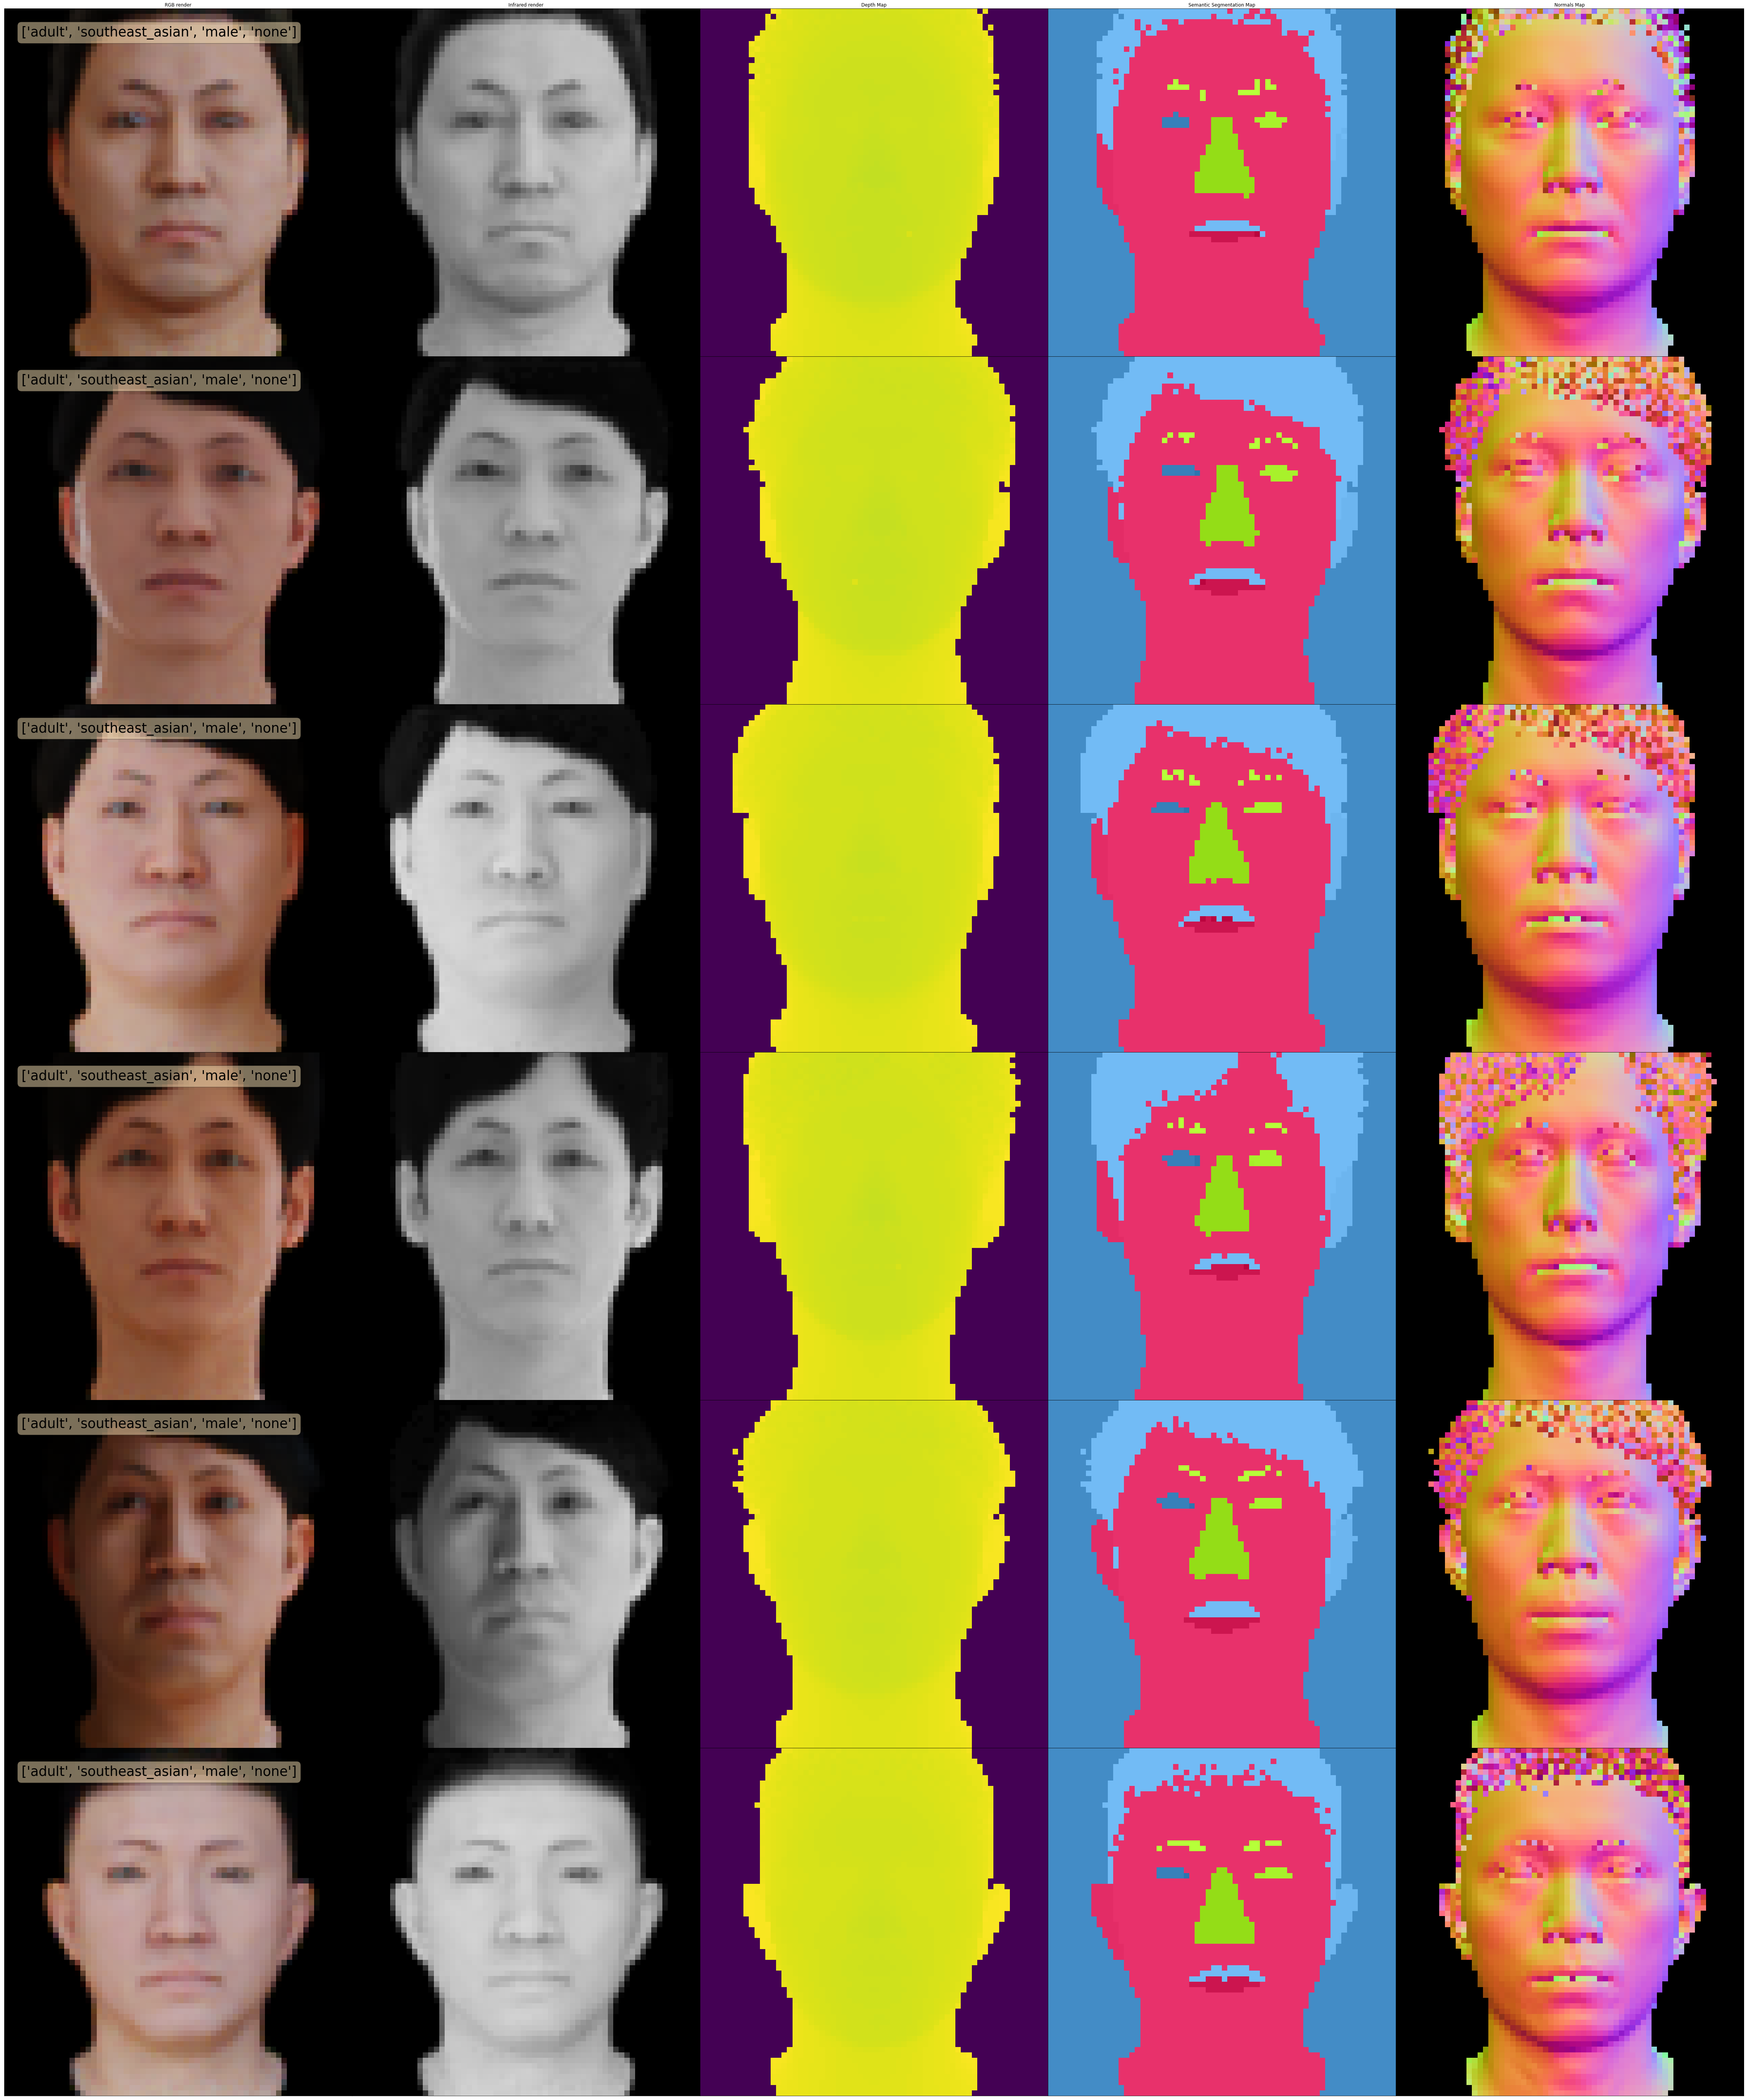

In [15]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Setting a random colormap for segmentation visualization
np.random.seed(2563)
segmap_colormap = (np.random.uniform(size=(1,1,3)) * 255).astype('uint8')

#TODO Add landmarks, segmentation, and modalities
#TODO Make the titles larger
# TODO add labels
#FIXME remove warnings, fix depth map
# Normalizing and clamping infinite values from depth map for better visualization
def normalize_depth_map(depth_map):
    depth_map = depth_map.copy()
    depth_map[depth_map > 2**15] = 0
    depth_map -= depth_map.min()
    depth_map /= depth_map.max()
    return depth_map

def segmap_to_color(segmap):
    segmap = np.repeat(segmap[..., np.newaxis], 3, axis=2)
    segmap = (np.sin(segmap * 255/20) * 127 + 128).astype('uint8')
    segmap += segmap_colormap
    return segmap

items_to_plot = min(len(ds), 6)
fig_shape = np.array((items_to_plot, 5))
figsize = 20 * fig_shape
fig = plt.figure(figsize=figsize)
grid = ImageGrid(fig, 111, nrows_ncols=fig_shape, axes_pad=0.)

imgs = []
labels = []
for i in range(items_to_plot):
    imgs += [ds[i].rgb_img, ds[i].ir_img, normalize_depth_map(ds[i].depth_img), segmap_to_color(ds[i].semantic_seg_map), ds[i].normals_map]
    labels += 5*[[ds[i].identity_label.age, ds[i].identity_label.ethnicity, ds[i].identity_label.gender, ds[i].face_expression.name]]

# TODO Make the title bigger
grid[0].set_title('RGB render')
grid[1].set_title('Infrared render')
grid[2].set_title('Depth Map')
grid[3].set_title('Semantic Segmentation Map')
grid[4].set_title('Normals Map')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for cnt, (ax, im, label) in enumerate(zip(grid, imgs, labels)):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(im)
    # TODO Improve text box formatting
    if cnt % 5 == 0:
        ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=35, verticalalignment='top', bbox=props)
